In [0]:
%matplotlib inline 

import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

numpy.random.seed(7)
dataframe = pandas.read_csv('passengers.csv', usecols = [1],  # 1번만 읽어 드린다. 
                            engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

96 48


In [0]:
# , window size로 독립변수와 종속변수를 분리 한다. 

def create_dataset(dataset, look_back = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i +look_back) , 0]   # 0 ~ 2 까지 . 
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])  # 마지막 데이터를 Y에 추가해준다. 
  return numpy.array(dataX), numpy.array(dataY)

In [0]:
look_back = 2 
# 자기 상관성이 이전 2개를 보면 다음 한개를 알 수 있다. ,
# 벡터 1개로 부터 종속변수 독립변수
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)  # 전체 사이즈가 줄어든다/ 
trainX.shape
model = Sequential()
# 2X8 사이즈 차원확대 
model.add(Dense(8, input_dim = look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs =200, batch_size = 2, verbose = 2)

(93, 2)







Epoch 1/200





 - 1s - loss: 90235.3566
Epoch 2/200
 - 0s - loss: 78757.6683
Epoch 3/200
 - 0s - loss: 70659.4462
Epoch 4/200
 - 0s - loss: 64837.7677
Epoch 5/200
 - 0s - loss: 60585.8644
Epoch 6/200
 - 0s - loss: 57509.6920
Epoch 7/200
 - 0s - loss: 55309.2628
Epoch 8/200
 - 0s - loss: 53697.4973
Epoch 9/200
 - 0s - loss: 52541.0220
Epoch 10/200
 - 0s - loss: 51643.4071
Epoch 11/200
 - 0s - loss: 50883.5132
Epoch 12/200
 - 0s - loss: 50092.7904
Epoch 13/200
 - 0s - loss: 49139.1691
Epoch 14/200
 - 0s - loss: 47781.4953
Epoch 15/200
 - 0s - loss: 45735.9639
Epoch 16/200
 - 0s - loss: 42640.5625
Epoch 17/200
 - 0s - loss: 38283.6710
Epoch 18/200
 - 0s - loss: 32573.4345
Epoch 19/200
 - 0s - loss: 26014.9244
Epoch 20/200
 - 0s - loss: 19142.2661
Epoch 21/200
 - 0s - loss: 13027.3005
Epoch 22/200
 - 0s - loss: 8095.2752
Epoch 23/200
 - 0s - loss: 4764.3830
Epoch 24/200
 - 0s - loss: 2637.5848
Epoch 25/200
 - 0s - loss: 1573.6061
Epoch 26/200
 - 0s - loss: 1020.7338
Epoch 

In [0]:
# 데이터 분할( 시계열 데이터 형태에 일치 시킴 )
# house 집값 예측 13, 종속변수 

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)) )

Train Score: 564.94 MSE (23.77 RMSE)


In [0]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 3.4MB/s 


In [0]:
import numpy as np 
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
df = pd.read_csv("austr.csv",skipfooter=3)
df.head()
df.info()
df.Month = pd.to_datetime(df.Month)   # 시간데이터 --> 문자열로 입력. 
df.columns = ['Month', 'beer']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                                                                                                                                               476 non-null object
Monthly beer production in Australia: megalitres. Includes ale and stout. Does not include beverages with alcohol percentage less than 1.15. Jan 1956 ? Aug 1995    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [0]:
df = df.set_index('Month')
df.head()
df.index.freq = 'MS'



[Text(0, 0.5, 'Total Production'), Text(0.5, 0, 'Dates')]

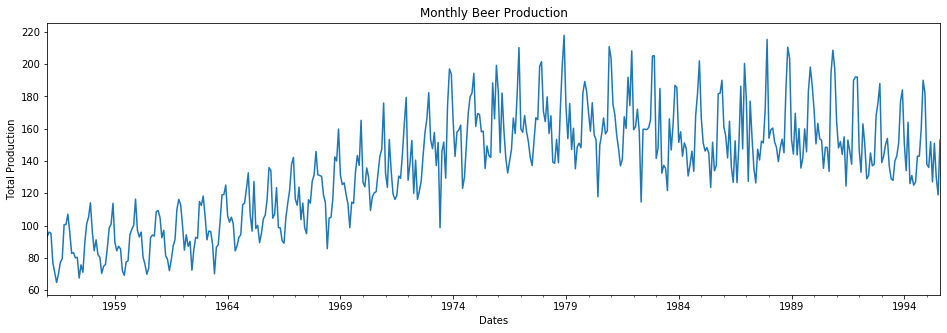

In [0]:
ax = df['beer'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel = 'Dates', ylabel = 'Total Production')

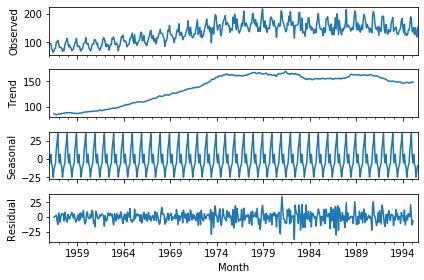

In [0]:
a = seasonal_decompose(df["beer"], model = "add")
a.plot();

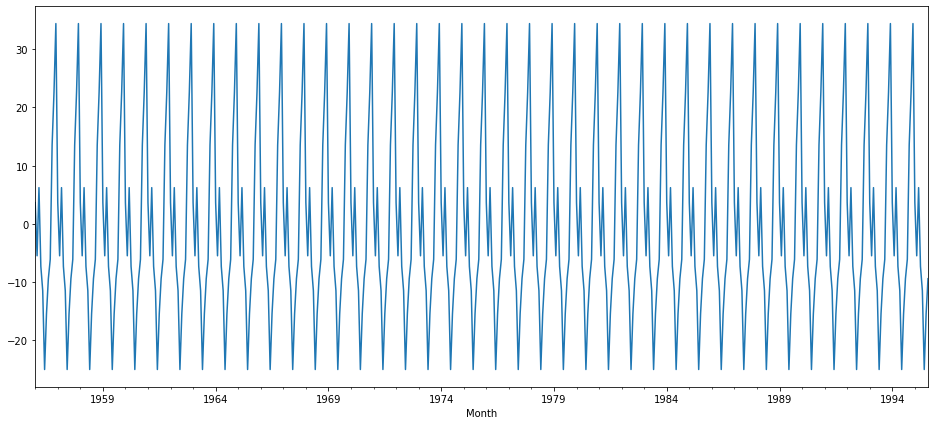

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
a.seasonal.plot()

In [0]:
# 대문자 P,D,Q  계절성 모델. # 차분 차수. 
# 소문자 p,d,q  비계절성 모델. 
auto_arima(df['beer'], seasonal = True, m = 12, max_p =7, max_d = 5, max_q = 7, max_P =4, max_D = 4, max_Q = 4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, 1, 12)   Log Likelihood               -1738.333
Date:                            Tue, 11 Feb 2020   AIC                           3498.666
Time:                                    02:55:52   BIC                           3544.462
Sample:                                         0   HQIC                          3516.676
                                            - 476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.019      0.065      0.948      -0.035       0.038
ar.L1         -1.1476      0.005   -216.109      0.000      -1.158      -1.137
ar.L2         -0.9907      0.006   -177.999      0.000      -1.002      -0.980
ma.L1          0.2198      0.024      9.030      0.000       0.172       0.268
ma.L2         -0.0084      0.024     -0.352      0.725      -0.055       0.038
ma.L3         -0.8616      0.023    -38.084      0.000      -0.906      -0.817
ar.S.L12       0.9675      0.084     11.579      0.000       0.804       1.131
ar.S.L24       0.0031      0.053      0.059      0.953      -0.100       0.107
ar.S.L36       0.0207      0.063      0.328      0.743      -0.103       0.144
ma.S.L12      -0.7595      0.071    -10.642      0.000      -0.899      -0.620
sigma2        80.5886      4.309     18.700      0.000      72.142      89.035
===================================================================================
Ljung-Box (Q):                       60.23   Jarque-Bera (JB):                36.74
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
# Stata ARIMA 아리마 모형 (비정상적 데이터 분석이 가능)
    # seasonal 계절성을 고려한 ARIMA( 비정상적 시계열 )
    # AR, MA, ARMA --> 정상성을 띈 시계열 분석 모델. 
train_data = df[:len(df) - 12]
test_data = df[len(df) - 12:]
arima_model = SARIMAX(train_data['beer'],
                      order = (2,1,3), seasonal_order = (3,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()
# 자기상관성 Ljing -Box
# Jarque -Bera  정규 분포의 적합도 정도확인 4.34:3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               beer   No. Observations:                  464
Model:             SARIMAX(2, 1, 3)x(3, 0, 1, 12)   Log Likelihood               -1697.293
Date:                            Tue, 11 Feb 2020   AIC                           3414.585
Time:                                    04:14:43   BIC                           3455.963
Sample:                                01-01-1956   HQIC                          3430.874
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1470      0.005   -219.730      0.000      -1.157      -1.137
ar.L2         -0.9901      0.006   -174.265      0.000      -1.001      -0.979
ma.L1          0.2331      0.026      8.973      0.000       0.182       0.284
ma.L2          0.0026      0.025      0.103      0.918      -0.047       0.053
ma.L3         -0.8571      0.024    -35.408      0.000      -0.905      -0.810
ar.S.L12       0.9910      0.081     12.173      0.000       0.831       1.151
ar.S.L24      -0.0162      0.055     -0.295      0.768      -0.124       0.092
ar.S.L36       0.0163      0.062      0.261      0.794      -0.106       0.139
ma.S.L12      -0.7950      0.068    -11.716      0.000      -0.928      -0.662
sigma2        83.0789      4.601     18.059      0.000      74.062      92.096
===================================================================================
Ljung-Box (Q):                       61.49   Jarque-Bera (JB):                32.87
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.65   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df) - 1, type = 'levels').rename('ARIMA Predictions')

arima_pred

1994-09-01    134.256563
1994-10-01    157.377792
1994-11-01    179.908988
1994-12-01    181.110974
1995-01-01    141.262719
1995-02-01    139.862042
1995-03-01    148.290301
1995-04-01    133.375199
1995-05-01    137.530604
1995-06-01    117.800210
1995-07-01    129.328103
1995-08-01    140.635141
Freq: MS, Name: ARIMA Predictions, dtype: float64

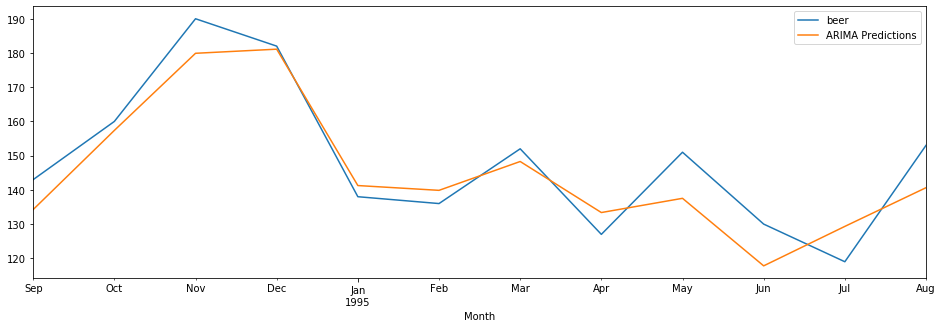

In [0]:
test_data['beer'].plot(figsize = (16,5), legend = True)
arima_pred.plot(legend = True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
# 1 2 3 4 5 6 7 8 9 10
#
import numpy as np
# 10개의 데이터를 취한 다음, 2개의 덩어리를 만들어야함
# sampling을 선택한다. 
data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])
data_gen = TimeseriesGenerator(data, targets, length = 10, sampling_rate = 2, batch_size = 2)
assert len(data_gen) == 20
batch_0 = data_gen[0]
batch_0

(array([[[0],
         [2],
         [4],
         [6],
         [8]],
 
        [[1],
         [3],
         [5],
         [7],
         [9]]]), array([[10],
        [11]]))

In [0]:
x,y = batch_0

In [0]:
x

array([[[0],
        [2],
        [4],
        [6],
        [8]],

       [[1],
        [3],
        [5],
        [7],
        [9]]])

In [0]:
y

array([[10],
       [11]])

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length = n_input, batch_size = 1)

In [0]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation = 'relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mse')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
lstm_model.fit_generator(generator, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0249
Epoch 2/20
452/452 [==============================] - 8s 17ms/step - loss: 0.0142
Epoch 3/20
452/452 [==============================] - 8s 17ms/step - loss: 0.0090
Epoch 4/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0079
Epoch 5/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0083
Epoch 6/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0077
Epoch 7/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0076
Epoch 8/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0069
Epoch 9/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0069
Epoch 10/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0068
Epoch 11/20
452/452 [==============================] - 8s 18ms/step - loss: 0.0076
Ep

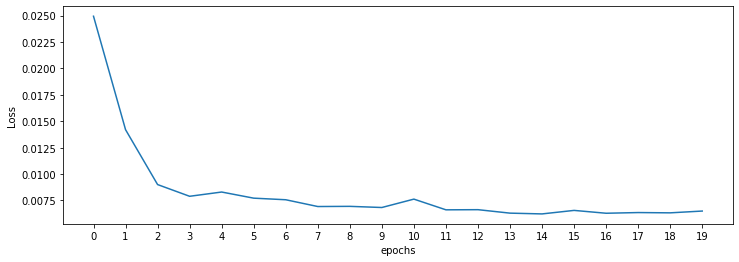

In [0]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [0]:
import re
import numpy as np
from keras.preprocessing.sequence import pad_sequences  # 동일한 사이즈로 맞추기 위한 패딩 
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense   #vectorization 

In [0]:
docs = ['Well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!',
        'Weak', 'Poor effort!', 'not good', 'poor work', 'Could have done better.']


labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 



In [0]:
# 중요 단어 10개 :dictionary
# 
own_embedding_vocab_size = 10
encoded_docs_oe = [one_hot(d, own_embedding_vocab_size) for d in docs]
print(encoded_docs_oe)

[[6, 9], [7, 9], [1, 6], [2, 9], [6], [7], [9, 6], [8, 7], [9, 9], [6, 6, 9, 1]]


In [0]:
maxlen = 5
padded_docs_oe = pad_sequences(encoded_docs_oe, maxlen = maxlen, 
                              padding = 'post')
print(padded_docs_oe)

[[6 9 0 0 0]
 [7 9 0 0 0]
 [1 6 0 0 0]
 [2 9 0 0 0]
 [6 0 0 0 0]
 [7 0 0 0 0]
 [9 6 0 0 0]
 [8 7 0 0 0]
 [9 9 0 0 0]
 [6 6 9 1 0]]


In [0]:
model = Sequential()
model.add(Embedding(input_dim = own_embedding_vocab_size,
                    output_dim = 32,
                    input_length = maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['acc'])
model.fit(padded_docs_oe, labels, epochs= 50, verbose=0)
loss, accuracy = model.evaluate(padded_docs_oe, labels, verbose=0)
print('Accuracy: %0.3f' % accuracy)

Accuracy: 0.800


In [0]:
predictions = model.predict(padded_docs_oe)



In [0]:
predictions

array([[0.6146327 ],
       [0.5827479 ],
       [0.5340282 ],
       [0.6120641 ],
       [0.57240224],
       [0.5396404 ],
       [0.42302907],
       [0.43472746],
       [0.51463544],
       [0.3895105 ]], dtype=float32)

In [0]:
word = 'Good work'
word_docs_oe = [one_hot(word, own_embedding_vocab_size)]
word_oe = pad_sequences(word_docs_oe, maxlen = maxlen, padding= 'post')
pred = model.predict(word_oe)
import numpy as np
pred

array([[0.5827479]], dtype=float32)

In [0]:
# 로이터 뉴스를 카테고리별 분리하기 

In [0]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from  keras.layers import Dropout

In [0]:
max_words = 1000
batch_size = 100
nb_epoch = 200
(X_train, y_train), (X_test, y_test) = reuters.load_data(nb_words = max_words, test_split = 0.2)
nb_classes = np.max(y_train) + 1
tokenizer = Tokenizer(nb_words = max_words)

In [0]:
X_train = tokenizer.sequences_to_matrix(X_train, mode ='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode = 'binary')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [0]:
model = Sequential()
model.add(Dense(512, input_shape = (max_words, ), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax' ))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train , nb_epoch = nb_epoch, batch_size = batch_size, 
                    verbose = 0, validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose = 1)
print('\n\nModel accuracy: %.2f%%' % (score[1]*100))
print('Model loss: %.2f%%' %(score[0]*100))

2246/2246 [==============================] - 0s 41us/step


Model accuracy: 78.23%
Model loss: 168.98%


In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 223kB/s 
     |████████████████████████████████| 2.3MB 44.8MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
# wordcloud

import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
res = requests.get('https://sports.news.naver.com/news.nhn?oid=109&aid=0004164151')


In [0]:
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('.newscenter')[0]
text = ' '.join(p.get_text() for p in body.find_all('p'))
text = body.get_text()
t = Twitter()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name = '스포츠')
ko.vocab().most_common(10)
data = ko.vocab().most_common(500)
tmp_data = dict(data)

In [0]:
FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/NanumMyeongjo.ttf")

In [0]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = "/Library/Fonts/NanumMyeongjo.ttf"
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumMyeongjo')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


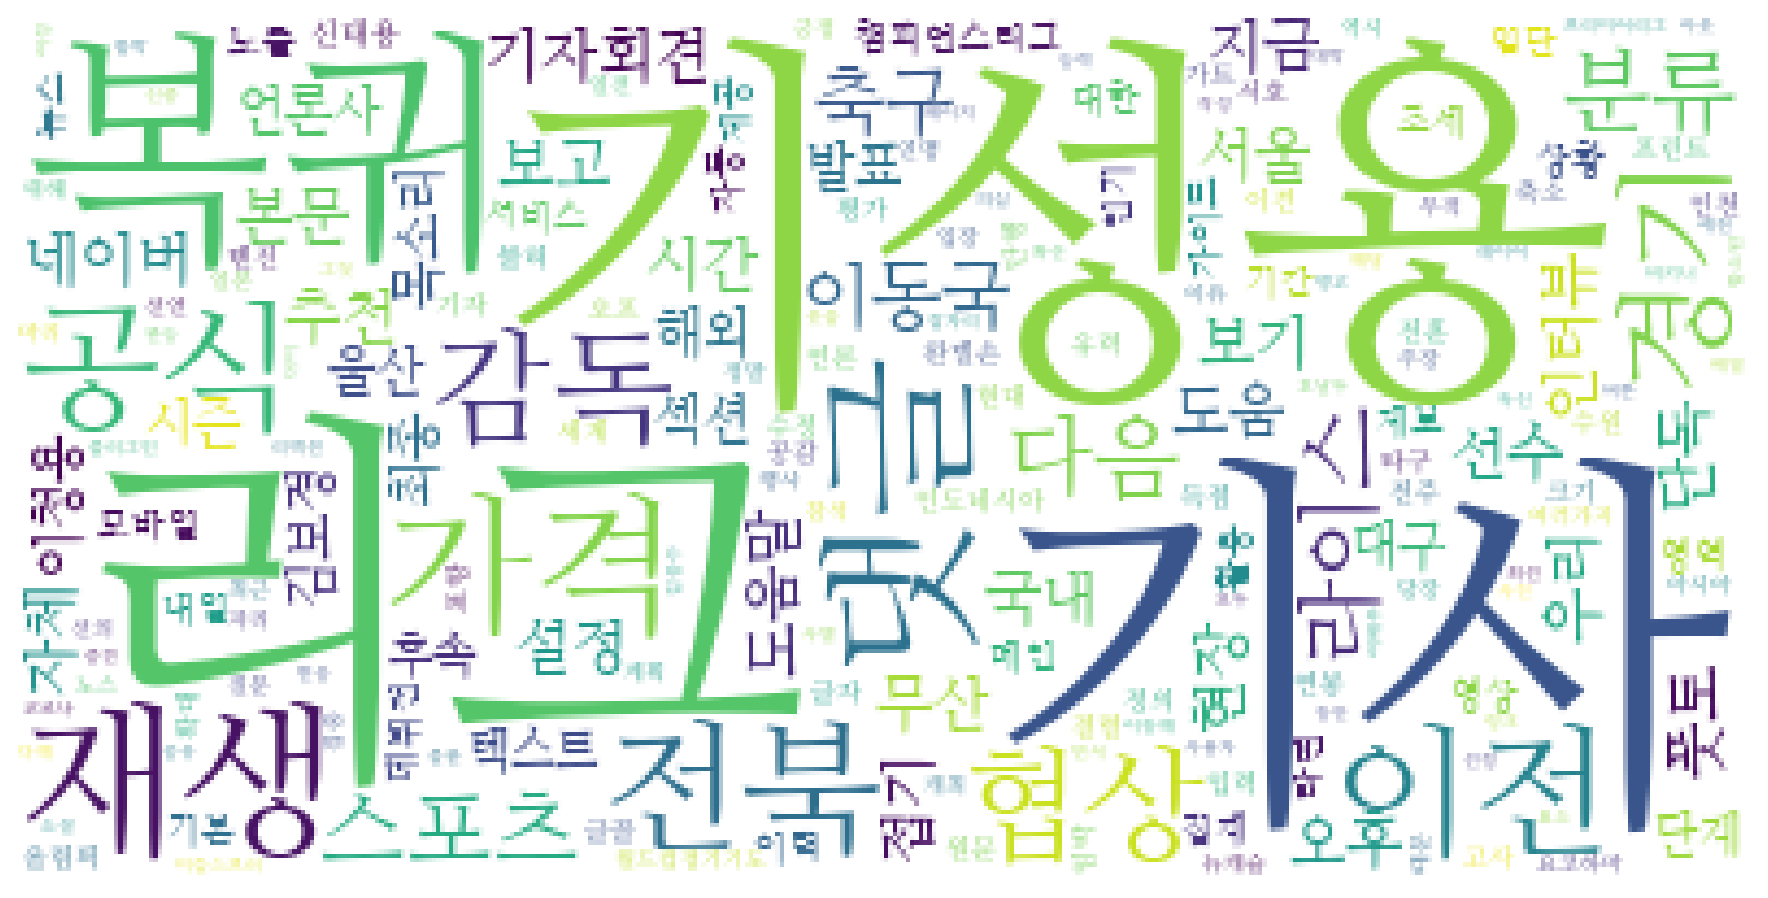

In [0]:
wordcloud = WordCloud(font_path=fontpath,background_color = 'white').generate(' '.join(tmp_data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
import tensorflow.compat.v1 as tf 
tf.global_variables 

<function tensorflow.python.ops.variables.global_variables>

In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.datasets import imdb
import numpy as np

(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words =2000)
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
model = Sequential()
model.add(Embedding(2000, 128))
model.add(LSTM(128, dropout= 0.2, recurrent_dropout =0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.fit( x_train, y_train, batch_size = 32, epochs =15,
         validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 123s 5ms/sample - loss: 0.4841 - acc: 0.7667 - val_loss: 0.4229 - val_acc: 0.8052
Epoch 2/15
25000/25000 [==============================] - 121s 5ms/sample - loss: 0.3893 - acc: 0.8270 - val_loss: 0.3938 - val_acc: 0.8201
Epoch 3/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.3505 - acc: 0.8449 - val_loss: 0.3760 - val_acc: 0.8349
Epoch 4/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.3220 - acc: 0.8599 - val_loss: 0.3808 - val_acc: 0.8354
Epoch 5/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.2925 - acc: 0.8735 - val_loss: 0.3736 - val_acc: 0.8394
Epoch 6/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.2718 - acc: 0.8838 - val_loss: 0.3713 - val_acc: 0.8379
Epoch 7/15
25000/25000 [==============================] - 120s 5ms/sample - loss: 0.2506 - acc: 0.8957 - val_l

In [5]:
dictionary = imdb.get_word_index(path = 'imdb_word_index.json')
imdb_key = dictionary.keys()
list(imdb_key)

1646592/1641221 [==============================] - 0s 0us/step


['fawn',
 'tsukino',
 'nunnery',
 'sonja',
 'vani',
 'woods',
 'spiders',
 'hanging',
 'woody',
 'trawling',
 "hold's",
 'comically',
 'localized',
 'disobeying',
 "'royale",
 "harpo's",
 'canet',
 'aileen',
 'acurately',
 "diplomat's",
 'rickman',
 'arranged',
 'rumbustious',
 'familiarness',
 "spider'",
 'hahahah',
 "wood'",
 'transvestism',
 "hangin'",
 'bringing',
 'seamier',
 'wooded',
 'bravora',
 'grueling',
 'wooden',
 'wednesday',
 "'prix",
 'altagracia',
 'circuitry',
 'crotch',
 'busybody',
 "tart'n'tangy",
 'burgade',
 'thrace',
 "tom's",
 'snuggles',
 'francesco',
 'complainers',
 'templarios',
 '272',
 '273',
 'zaniacs',
 '275',
 'consenting',
 'snuggled',
 'inanimate',
 'uality',
 'bronte',
 'errors',
 'dialogs',
 "yomada's",
 "madman's",
 'dialoge',
 'usenet',
 'videodrome',
 "kid'",
 'pawed',
 "'girlfriend'",
 "'pleasure",
 "'reloaded'",
 "kazakos'",
 'rocque',
 'mailings',
 'brainwashed',
 'mcanally',
 "tom''",
 'kurupt',
 'affiliated',
 'babaganoosh',
 "noe's",
 'qua

In [0]:
# 숙제 
# 문제 x_train[1] 문장으로 변환해 보시오. 
# model.summary 를 해보고 가중치 사이즈를 계산해 보시오. 

In [0]:
word = imdb.get_word_index()
index_to_word = {}
for key, value in word.items():
  index_to_word[value] = key


In [11]:
print(([list(imdb_key)[x] for x in x_train[1]]))

['hj', "'pleasure", 'nunnery', 'nunnery', "harpo's", 'norliss', 'assimilates', 'nunnery', 'stern', 'woods', 'vani', 'golem', 'trawling', 'thrace', 'nunnery', 'photon', "harpo's", 'feeling', 'beswick', 'woods', 'beswick', 'kuei', 'comically', 'approporiately', 'welcomed', "post's", '273', 'trawling', 'nunnery', 'golem', 'nunnery', 'woods', 'nunnery', 'humbled', 'ugghhh', 'nunnery', 'woods', 'vani', 'nunnery', 'gershon', "chapters'", 'conditioned', 'acurately', 'nunnery', 'bravora', 'nunnery', 'being', "'royale", 'trawling', 'spiders', 'sturgess', 'babaganoosh', 'rumbustious', "teenager's", 'videodrome', "hetfield's", 'trawling', 'woody', 'dongen', 'pinto', 'familiarness', 'vani', 'walberg', "harpo's", 'canet', 'vani', 'unwelcomed', 'woods', "hangin'", 'spiders', '275', 'uselessness', 'tonino', 'grueling', 'cobblers', 'babaganoosh', 'mutilated', 'canet', 'pinto', 'gateshead']


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(x_train.shape)

(25000, 80)


In [14]:
print(y_train.shape)

(25000,)


In [0]:
# 25000 X 80 , 80 X 128 --> 25000 X128
# None== 128 --> 128 X 128 
# 25000 X 128 , 128 X 128 --> 25000 X 128 
# 25000 X 128 , None(128) X 1 --> 25000 X 1...